# PCA - Principal Component Analysis

PCA (Principal Component Analysis), ou Análise de Componentes Principais, é uma técnica estatística muito utilizada em machine learning para reduzir a dimensionalidade dos dados. Em muitos problemas, os conjuntos de dados possuem um grande número de variáveis (features), e várias delas podem estar correlacionadas entre si. O PCA transforma esse conjunto original de variáveis em um novo conjunto menor de variáveis chamadas componentes principais, que são combinações lineares das variáveis originais.

A principal ideia do PCA é preservar o máximo possível da variância dos dados ao mesmo tempo em que reduz o número de dimensões. A primeira componente principal é a direção no espaço dos dados que explica a maior parte da variabilidade. A segunda componente explica a maior parte da variância restante, sendo ortogonal à primeira, e assim sucessivamente. Ao selecionar apenas as primeiras componentes — que concentram a maior parte da informação — é possível representar os dados de forma mais compacta, reduzindo complexidade e custo computacional.

Matematicamente, o processo envolve centralizar os dados (subtrair a média), calcular a matriz de covariância e obter seus autovalores e autovetores. Os autovetores definem as novas direções (componentes principais) e os autovalores indicam quanta variância cada componente explica. Os dados são então projetados nesse novo espaço.

As etapas básicas para implementação do PCA são:
1. Padronização dos dados - média zero e variância 1 
2. Cálculo da matriz de convariância ou SVD
3. Cálculo dos autovetores e autovalores
4. Seleção de componentes principais 
5. Projeção dos dados

Outras abordagens incluem: t-distributed stochastic neighbor embedding (t-SNE), Linear Discriminant Analysis (LDA) e outros autoencoders.

Explicação youtube:
* https://www.youtube.com/watch?v=FD4DeN81ODY
* https://www.youtube.com/watch?v=FgakZw6K1QQ
* https://www.youtube.com/watch?v=oRvgq966yZg

Documentação:
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [6]:
#importações 
import pandas as pd 
import numpy as np 
import seaborn as sns 
from scipy import stats 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline 

#### Hands-on 1: 
Dados utilizados: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [7]:
#1. Carrega dados 
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
cancer = load_breast_cancer()

In [8]:
#2. Leitura do conteúdo
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
#3. Leitura da documentação
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [10]:
#4. Transforma o conteúdo dos dados em dataframe
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [11]:
#5. Normaliza dados
scaler = StandardScaler() 
scaler.fit(df) 
scaled_data = scaler.transform(df)

In [12]:
#6. Aplica PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [13]:
#7. Compara dimensões antes e depois da aplicação do PCA
print("Dimensões originais: ",scaled_data.shape)
print("Dimensões pós aplicação do PCA: ",x_pca.shape)

Dimensões originais:  (569, 30)
Dimensões pós aplicação do PCA:  (569, 2)


Text(0, 0.5, 'Segundo componente principal')

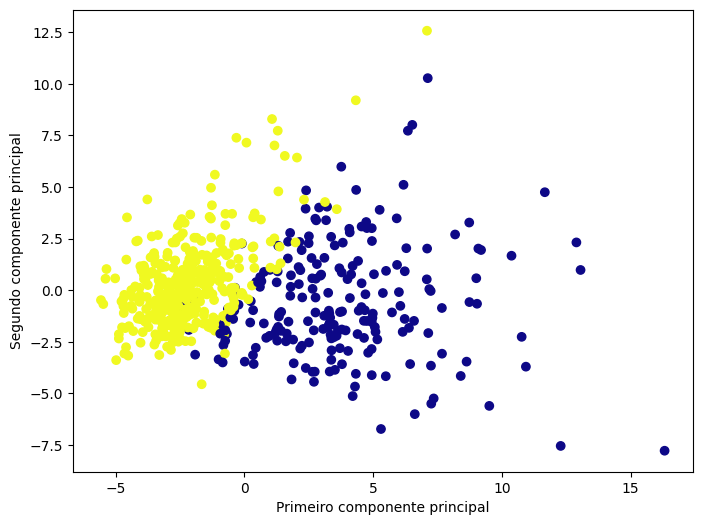

In [14]:
#8. Visualiza novo formato 
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'], cmap='plasma')
plt.xlabel('Primeiro componente principal')
plt.ylabel('Segundo componente principal')

Podemos observar que podemos separar facilmente essas duas classes dadas a partir do uso desses dois componentes!

In [15]:
#9. Veja o peso de cada atributo
#Cada linha representa um componente principal e cada coluna se relaciona novamente aos recursos originais 
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

<Axes: >

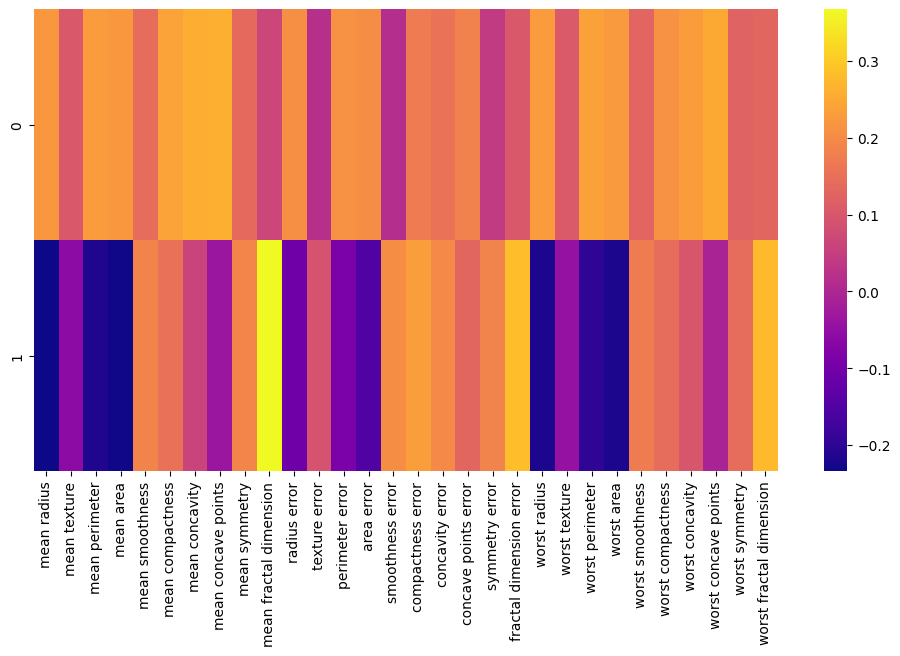

In [16]:
#10. Visualização da correlação entre os vários recursos e o próprio componente principal
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma',)

#### Hands-on 2: 
Dados utilizados: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

In [17]:
#1.Carrega dados 
faces = fetch_lfw_people(min_faces_per_person=60) #mínimo de faces por pessoa
print(faces.target_names)
print(faces.images.shape)

KeyboardInterrupt: 

In [ ]:
#2.Exploração dos dados - visualiza como as figuras aparecem no banco de dados
fig, ax = plt.subplots(3, 5, figsize=(8,6))
for i, axi in enumarate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
    xlabel=faces.target_names[faces.target[i]]) #trás o nome embaixo da foto

Cada imagem contém 62x47, ou cerca de 3.000 pixels. Poderíamos prosseguir simplesmente usando cada valor de pixel como um recurso, mas muitas vezes é mais eficaz usar algum tipo de pré-processador para extrair recursos mais significativos; aqui usaremos a análise de componentes principais (PCA) para extrair 150 componentes fundamentais para alimentar nosso classificador de máquina de vetores ed suporte. Podemos fazer isso de maneira mais direta, empacotando o pré-processador e o classifcador em um único pipeline:

In [ ]:
#3.Pré-processamento - aplicação do PCA
pca = PCA(n_components=150, 
            whiten=True,
            svd_solver='randomized',
            random_state=42)
svc = SVC(kearnel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
#4.Divisão entre treino e teste
xtrain, xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [ ]:
#5.Validação cruzada de pesquisa em grade para explorar combinação de parâmetros 
param_grid = {'svc_C': [1, 5, 10, 50],
            'svc_gamma': [0.001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(xtrain, ytrain)
print(grid.best_params_)

Os valores ideais ficam no meio da nossa grade; se caíssem nas bordas, gostaríamos de expandir a grade para ter certeza de que encontramos o verdadeiro ótimo.
Agora, com esse modelo de validação cruzada, podemos prever os rótulos dos dados de teste, que o modelo ainda não viu.

In [ ]:
model = grid.best_estimator_
yfit = model.predict(xtest)

In [ ]:
#6.Visualiza imagens de teste e seus valores previstos 
fig, ax = plt.subplots(4,6)
for i, axi in enumarate(ax.flat):
    axi.imshow(xtest[i].reshape(62,47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], 
                    color='black' if yfit[i] == ytest[i] else 'red')
    fig.subtitle('Predicted Names; Incorrent Labels in Red', size=14);

In [ ]:
#7.Analisa performance
print(classification_report(ytest, yfit, target_names=faces.target_names))

In [ ]:
#8. Matriz de confusão
#nos ajuda a ter uma noção de quais rótulos provavelmente serão confundidos pelo estimador
mat = confusion_matrix(ytest,yfit)
sns.heatmap(mat.T, 
            square=True, 
            anoot=True, 
            fmt='d', 
            cbar=False, 
            cmap='Blues',
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel=('true label')
plt.ylabel=('predicted label')